# Clasificación de clientes

Objetivo: Usar LDA para clasificar clientes como solventes o no solventes según indicadores financieros.








Author:

Date:

## Importar librerías

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix

## Leer datos

In [26]:
dataset = pd.read_csv("financial_data.csv")


## mostrar los primeros 5

In [27]:
dataset.head()

,income,debt,credit_history,solvent
0,57450.712295,26483.242833,392.115420,0
1,47926.035482,33365.916483,357.512312,0
2,59715.328072,10210.026983,650.036637,1
3,72845.447846,23940.784657,688.561650,1
4,46487.699379,15445.502016,317.372380,1


# mostrar los últimos 5

In [28]:
dataset.tail()

,income,debt,credit_history,solvent
495,58083.650655,18032.297950,705.588573,1
496,34441.307685,32583.805688,581.722056,0
497,47144.919829,24485.900029,674.125279,0
498,36865.726199,16001.747072,322.920095,0
499,29258.004036,24008.079469,346.635609,0


## mostrar la información

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          500 non-null    float64
 1   debt            500 non-null    float64
 2   credit_history  500 non-null    float64
 3   solvent         500 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.8 KB


## mostrar el tamaño

In [30]:
dataset.shape

(500, 4)

## mostrar estadisticas descriptivas

In [31]:
dataset.describe()

,income,debt,credit_history,solvent
count,500.000000,500.000000,500.000000,500.000000
mean,50102.569919,20222.782819,576.198897,0.486000
std,14718.798710,6845.980366,159.284756,0.500305
min,1380.989899,1121.793499,302.716990,0.000000
25%,39495.388933,15832.957821,431.324111,0.000000
50%,50191.957195,20199.721197,580.952113,0.000000
75%,59551.748812,24558.696083,705.085971,1.000000
max,107790.972360,38426.674454,849.677549,1.000000


## graficar las variables

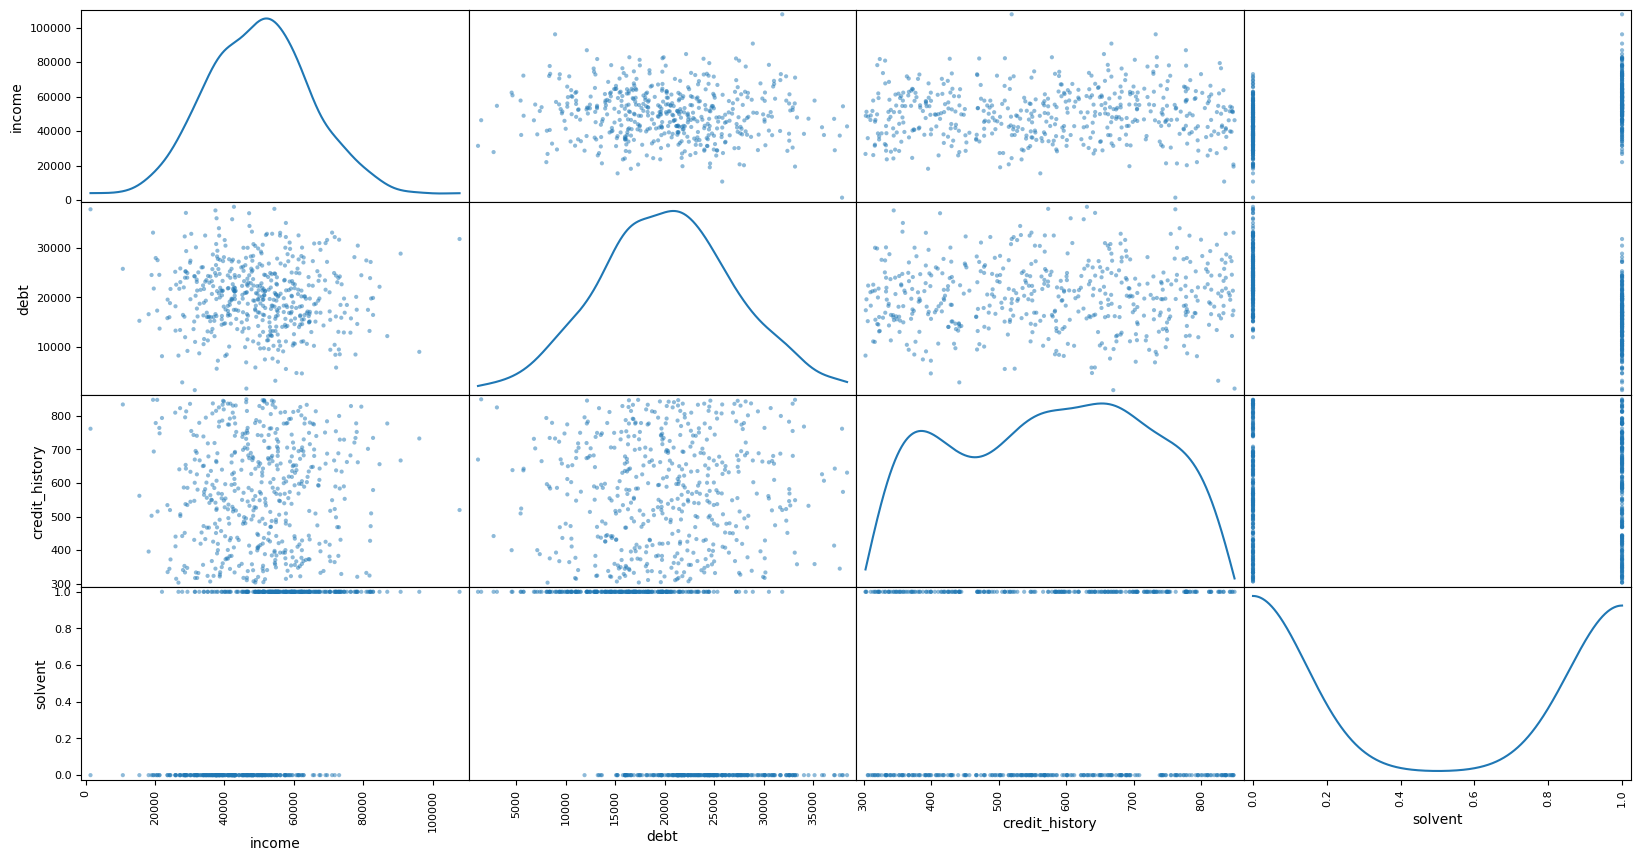

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(dataset, diagonal="kde", figsize=(20,10))
plt.show()

## separar los datos

In [38]:
X = dataset[["income", "debt", "credit_history"]]
y = dataset["solvent"]  # 0 = No solvente, 1 = Solvente

## normalizar los datos

In [39]:
scaler = StandardScaler()


## dividir los datos entre trainning y test

In [50]:
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## aplicar LDA

In [54]:
lda = LDA()
X_lda = lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [52]:
lda.scalings_

array([[ 1.15508824],
       [-1.27702202],
       [-0.01554767]])

In [55]:
# Obtener los coeficientes (loadings)
coefficients = pd.DataFrame(lda.scalings_, index=X.columns, columns=['LD1'])
coefficients

,LD1
income,1.155088
debt,-1.277022
credit_history,-0.015548


In [57]:
X_lda

LinearDiscriminantAnalysis()

## evaluación del modelo

In [61]:
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
cmd = confusion_matrix(y_test, y_pred)
print(cmd)

Precisión: 0.9866666666666667
Matriz de confusión:
[[73  0]
 [ 2 75]]


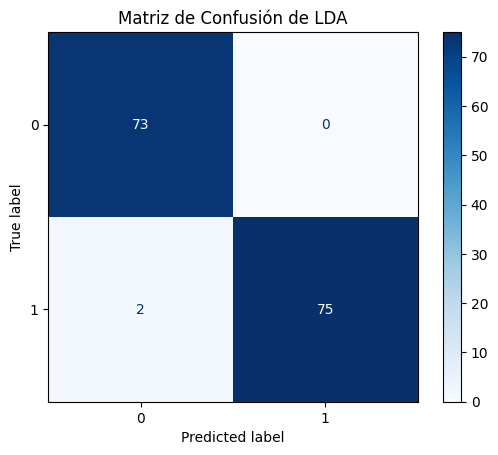

In [62]:
from sklearn.metrics import  ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=cmd, display_labels=lda.classes_)
# Visualizar la matriz de confusión
cmd.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión de LDA')
plt.show()

## Visualización de los discriminantes

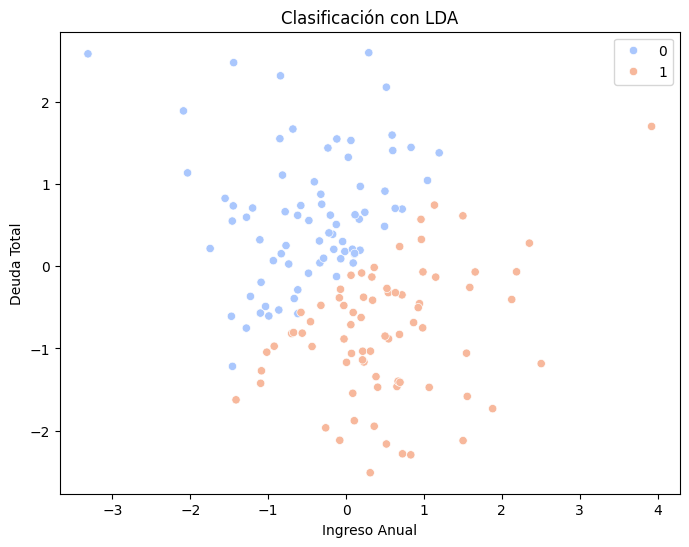

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette='coolwarm')
plt.xlabel("Ingreso Anual")
plt.ylabel("Deuda Total")
plt.title("Clasificación con LDA")
plt.show()